**Application de l'apprentissage non supervisé**

Les données utilisées ont été extraites à partir du lien suivant : https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set. Ces données concernent les clients d'un distributeur en gros et comprennent les dépenses annuelles, exprimées en unités monétaires (MU), pour six catégories de produits (produits frais, produits laitiers, épicerie, produits surgelés, produits ménagers, charcuterie). Les valeurs associées à ces catégories sont des données continues, tandis que les variables canal et région sont binaires.

À présent, nous allons charger les données, effectuer différentes analyses et, si nécessaire, prétraiter les données afin de pouvoir appliquer le modèle de régression linéaire.

chargement des données et des bibliothèques

In [27]:
!pip install dabl

                                              0.0/564.3 kB ? eta -:--:--
     --                                      30.7/564.3 kB 1.3 MB/s eta 0:00:01
     --                                      30.7/564.3 kB 1.3 MB/s eta 0:00:01
     ----                                  71.7/564.3 kB 558.5 kB/s eta 0:00:01
     -------------                          194.6/564.3 kB 1.1 MB/s eta 0:00:01
     ------------------------               358.4/564.3 kB 1.6 MB/s eta 0:00:01
     --------------------------             399.4/564.3 kB 1.8 MB/s eta 0:00:01
     --------------------------             399.4/564.3 kB 1.8 MB/s eta 0:00:01
     --------------------------             399.4/564.3 kB 1.8 MB/s eta 0:00:01
     --------------------------           409.6/564.3 kB 981.2 kB/s eta 0:00:01
     -------------------------------        460.8/564.3 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   542.7/564.3 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  563

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import dabl
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [36]:
data=pd.read_csv('Wholesale customers data.csv')

In [38]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [39]:
data.shape

(440, 8)

In [40]:
data_bis = dabl.clean(data, verbose=1)
dabl.detect_types(data_bis)

Detected feature types:
continuous                  6
dirty_float                 0
low_card_int_ordinal        0
low_card_int_categorical    0
categorical                 2
date                        0
free_string                 0
useless                     0
dtype: int64


,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
Channel,False,False,False,False,True,False,False,False
Region,False,False,False,False,True,False,False,False
Fresh,True,False,False,False,False,False,False,False
Milk,True,False,False,False,False,False,False,False
Grocery,True,False,False,False,False,False,False,False
Frozen,True,False,False,False,False,False,False,False
Detergents_Paper,True,False,False,False,False,False,False,False
Delicassen,True,False,False,False,False,False,False,False


Cela confirme bien ce que l'on a affirmé initialement, c'est à dire que les données alimentaires sont continues.

**Approche EDA (Analyse Exploratoire des Données)**

L'EDA (Analyse Exploratoire de Données) est une méthode qui permet d'analyser et de synthétiser des ensembles de données dans le but d'obtenir des informations et de comprendre les schémas et les relations qui se cachent derrière les données.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [42]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [43]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Il est évident que les données ne sont pas standardisées et ne suivent pas une distribution normale.

In [44]:
print(data.Channel.value_counts())
print(data.Region.value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


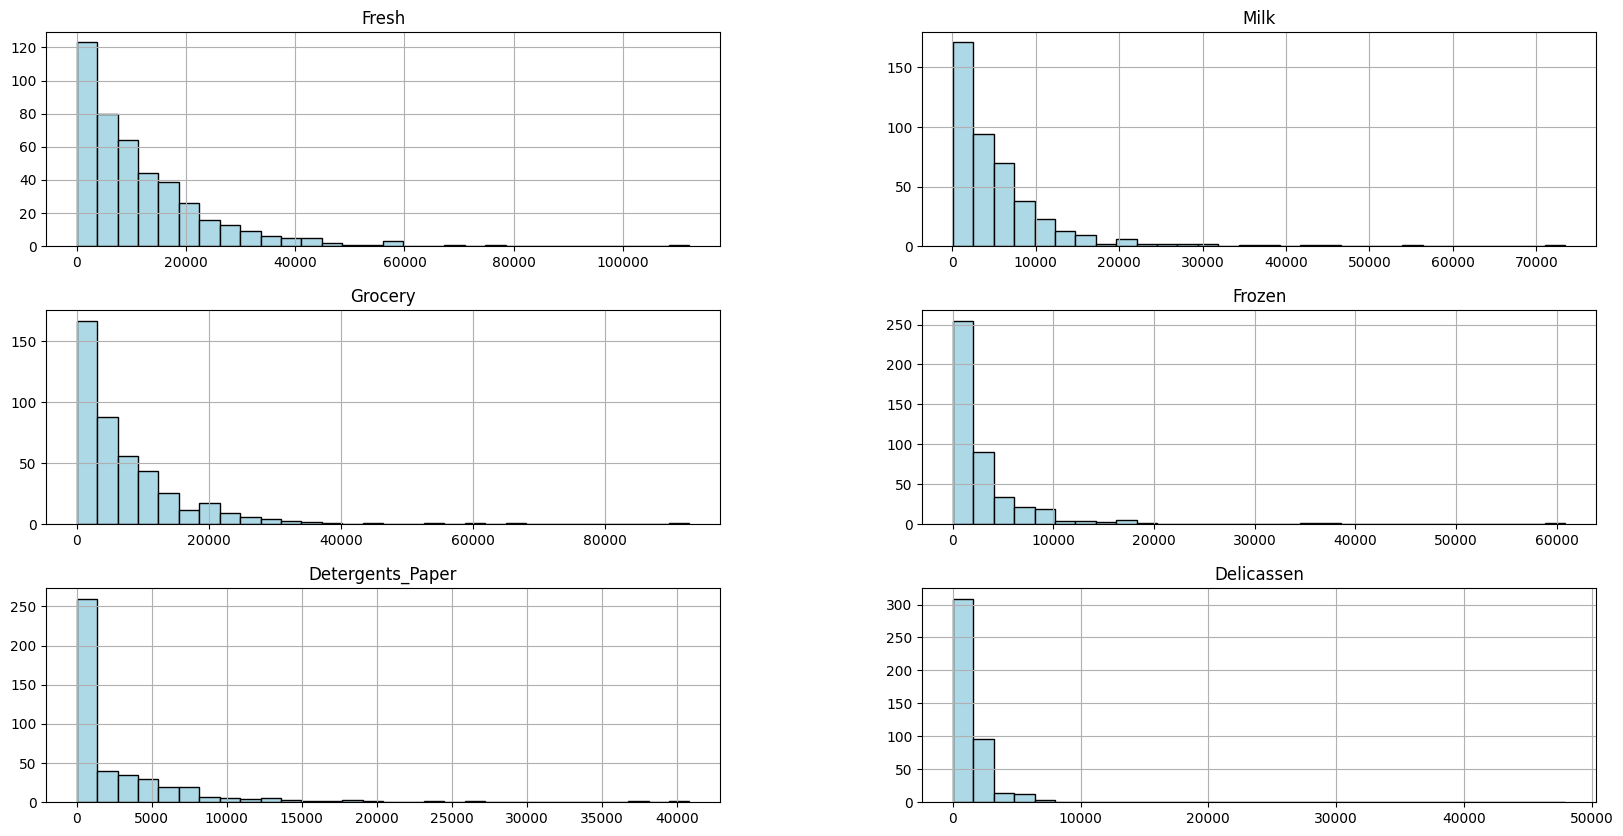

In [45]:
data_without_channels_regions = data.drop(["Channel", "Region"], axis=1)
data_without_channels_regions.hist(figsize=(20, 10), bins=30, color='lightblue', edgecolor='black')
plt.show()


Les données présentent une distribution très asymétrique et contiennent de nombreuses valeurs aberrantes, ce qui pourrait avoir un impact négatif sur notre analyse. Plus spécifiquement, l'algorithme K-Means est sensible aux valeurs aberrantes influentes, car elles peuvent considérablement fausser l'estimation des centroïdes. Dans cette situation, il peut être conseillé d'utiliser l'algorithme K-Medians qui est plus robuste face aux valeurs aberrantes.

Cependant, une autre approche consiste à transformer les données. Nous allons utiliser la méthode de transformation de Box-Cox qui peut être mise en œuvre en utilisant la fonction PowerTransformer() de la bibliothèque Scikit-Learn ou en utilisant la fonction box-cox de la bibliothèque Scipy Stats. Dans cet exemple, nous opterons pour la deuxième option, c'est-à-dire la fonction box-cox de la bibliothèque Scipy Stats.

In [48]:
lamb=[]
confidence=[]
for i in data.columns[2:]:
    data[i], coef, conf = boxcox(data[i]+1E-6, alpha=0.05)   # valeur strc > 0 
    lamb.append(coef)
    confidence.append(conf)


Il est également nécessaire de mettre les données à l'échelle afin d'éviter tout biais dans l'analyse des distances entre les dimensions. L'algorithme KMeans effectue son analyse en considérant les variables sur la même échelle, ce qui signifie que des données non mises à l'échelle peuvent entraîner un apprentissage biaisé. Il est donc nécessaire de mettre les données à l'échelle en utilisant la même unité ou "dimension de distance" afin de garantir une analyse correcte et équilibrée.

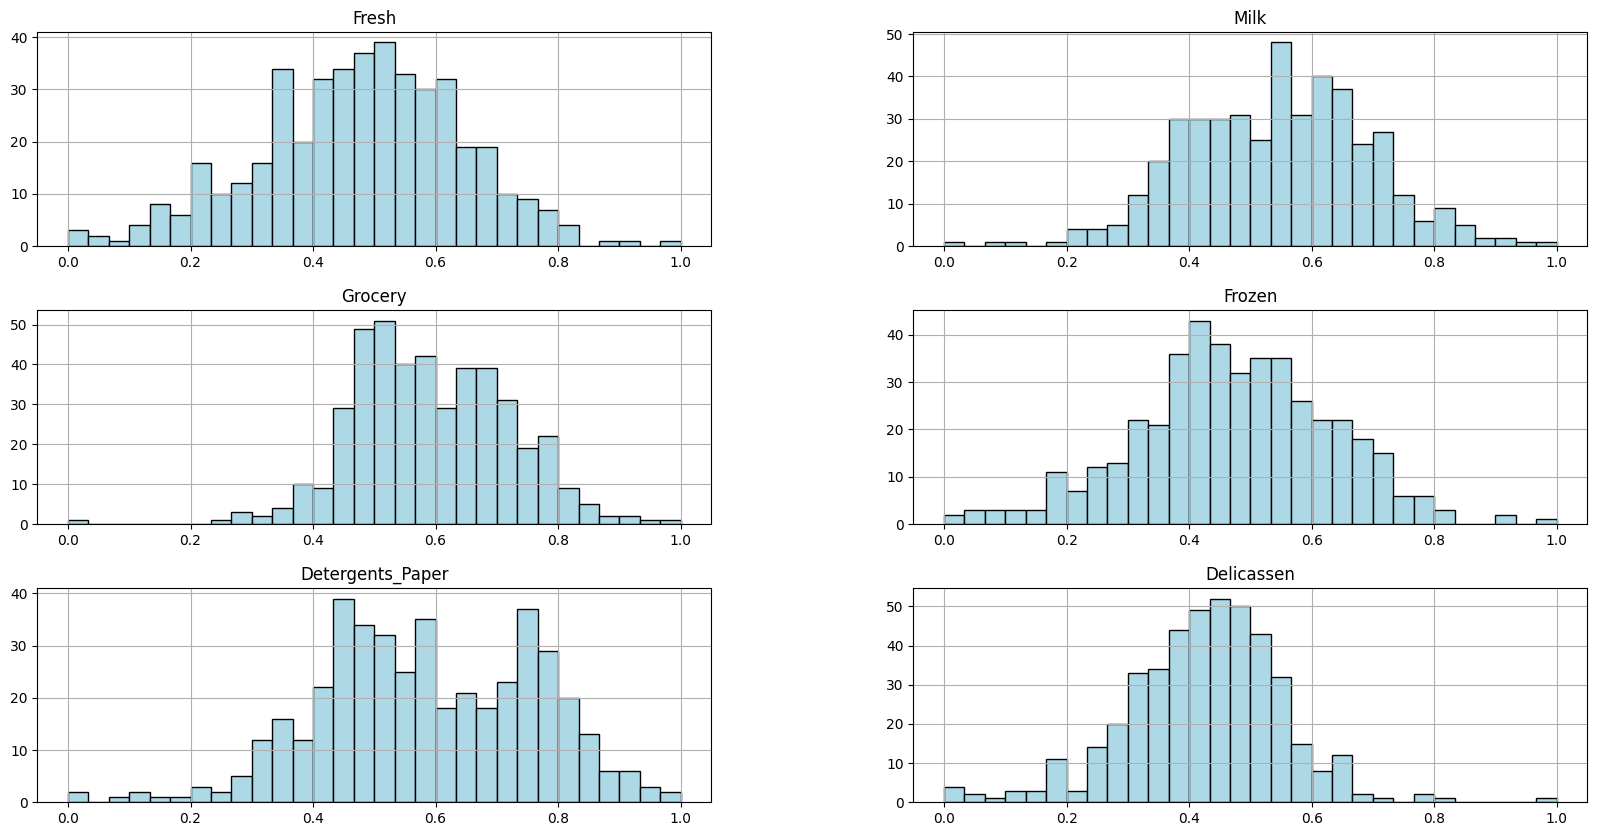

In [49]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = data.columns[2:]

data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].min()) / (data[columns_to_normalize].max() - data[columns_to_normalize].min())

data_without_channels_regions = data.drop(["Channel", "Region"], axis=1)
data_without_channels_regions.hist(figsize=(20, 10), bins=30, color='lightblue', edgecolor='black', range=(0, 1))
plt.show()


recherche de l'existence de corrélation entre les variables

<Axes: >

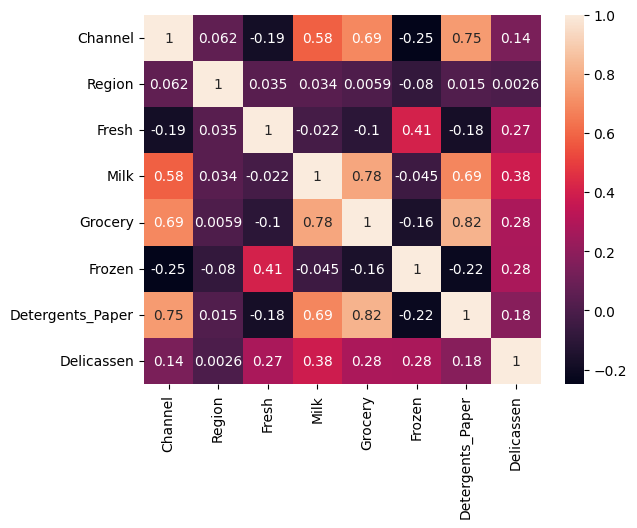

In [20]:
my_corr_data = data.corr()
sns.heatmap(my_corr_data, annot= True)

Nous constatons, qu'à l'exception de la colonne Channel, il n'y a pas de corrélation significative entre les différentes variables.

**Clusteurisation**

Pour se faire, nous devons numériser l'ensemble des données, avec la fonction get_dummies

In [31]:
df = pd.get_dummies(data)

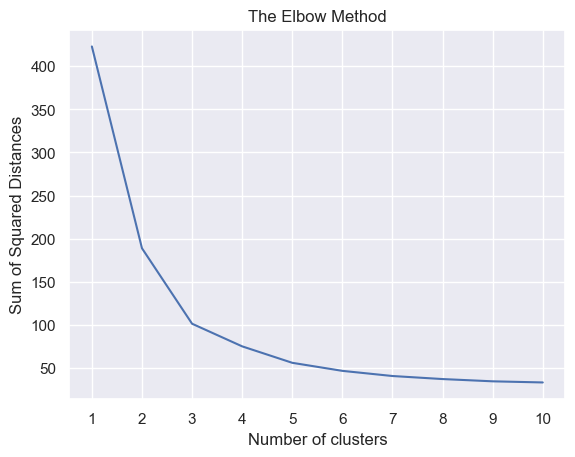

In [54]:
data = df.iloc[:,:].values

sns.set()

sum_of_squared_distances = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(data)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, 11), sum_of_squared_distances)
plt.xticks(ticks=range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

Ainsi, en observant la courbe de la somme des distances au carré, nous constatons qu'à partir de 5 clusters, il y a une diminution significative de la variation intra-cluster. Les différences deviennent moins prononcées au-delà de ce nombre. Par conséquent, nous commencerons par prendre 5 clusters afin  optimiser leur nombre.

entrainement du model KMeans sur le dataset

In [56]:
kmeans = KMeans(n_clusters = 5,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
y_kmeans = kmeans.fit_predict(data)

In [59]:
df_cluster = df
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,0.493063,0.668021,0.633620,0.210310,0.648299,0.430060,1
1,2,3,0.406634,0.670440,0.663649,0.459775,0.672901,0.463533,1
2,2,3,0.392700,0.654019,0.635652,0.500707,0.680715,0.668670,1
3,1,3,0.500542,0.370070,0.562760,0.637211,0.463735,0.464349,2
4,2,3,0.595670,0.581186,0.627449,0.567137,0.601017,0.606136,1


répartition des éléments dans les différents clusters

In [60]:
df_cluster.Cluster.value_counts()


2    211
1    105
4     59
3     37
0     28
Name: Cluster, dtype: int64

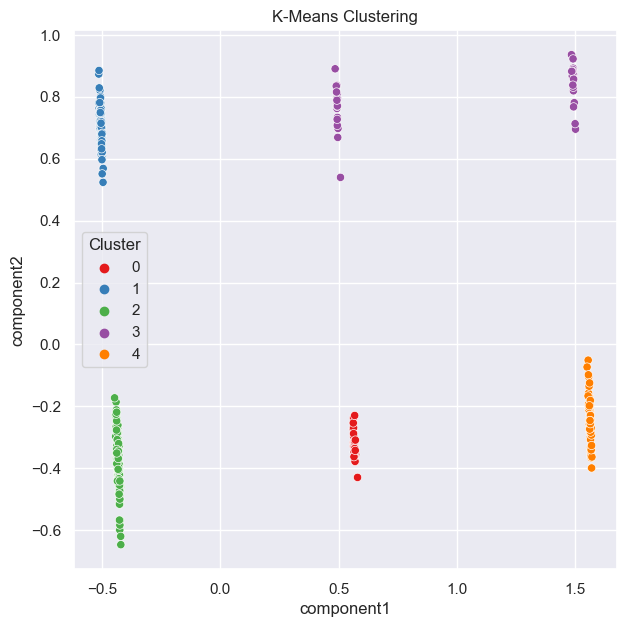

In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data)

pca_df = pd.DataFrame(pca_components, columns=['component1', 'component2'])
clustered_data = pd.concat([pca_df, df_cluster['Cluster']], axis=1)

plt.figure(figsize=(7, 7))
sns.scatterplot(x='component1', y='component2', hue='Cluster', data=clustered_data, palette='Set1').set_title('K-Means Clustering')
plt.show()

Nous avons remarqué une particularité dans le cluster violet, où il semble se scinder en deux sous-clusters distincts, malgré le fait que les données appartiennent initialement au même cluster. Cette division se manifeste par la présence de deux ensembles distincts de points dumême cluster. Dans le but d'explorer cette division plus en détail et d'évaluer s'il est possible d'obtenir une meilleure solution, nous allons tester la clusterisation en utilisant d'abord 6 puis 7 clusters pour voir si cela permet de mieux représenter la structure des données.
Par ailleurs, nous pouvons également constater que les clusters présentent une distribution linéaire.

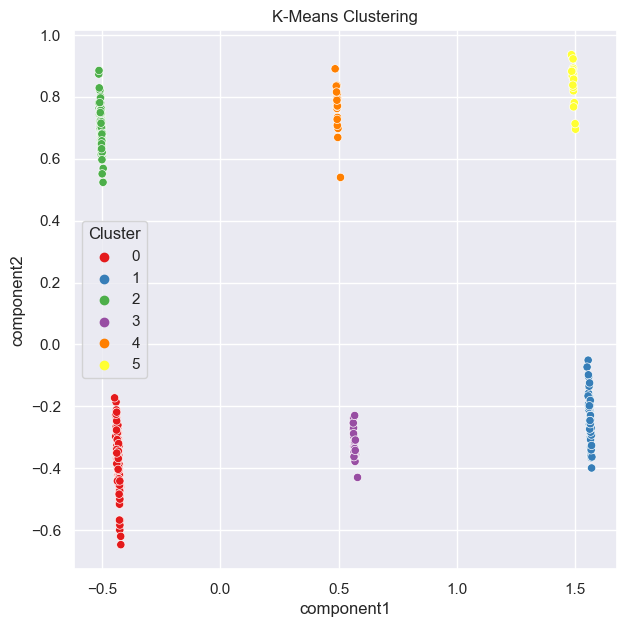

In [65]:
kmeans = KMeans(n_clusters = 6,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
y_kmeans = kmeans.fit_predict(data)

df_cluster = df
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data)

pca_df = pd.DataFrame(pca_components, columns=['component1', 'component2'])
clustered_data = pd.concat([pca_df, df_cluster['Cluster']], axis=1)

plt.figure(figsize=(7, 7))
sns.scatterplot(x='component1', y='component2', hue='Cluster', data=clustered_data, palette='Set1').set_title('K-Means Clustering')
plt.show()

Effectivement, en utilisant 6 clusters, nous pouvons constater que les données du cluster violet, qui étaient précédemment divisées en deux nuages de points distincts, sont désormais bien séparées en deux groupes distincts. De plus, les nuages de points dans l'ensemble des clusters semblent être uniformément répartis et alignés de manière linéaire dans la direction verticale. Cela suggère une meilleure représentation et une meilleure séparation des différentes structures des données.

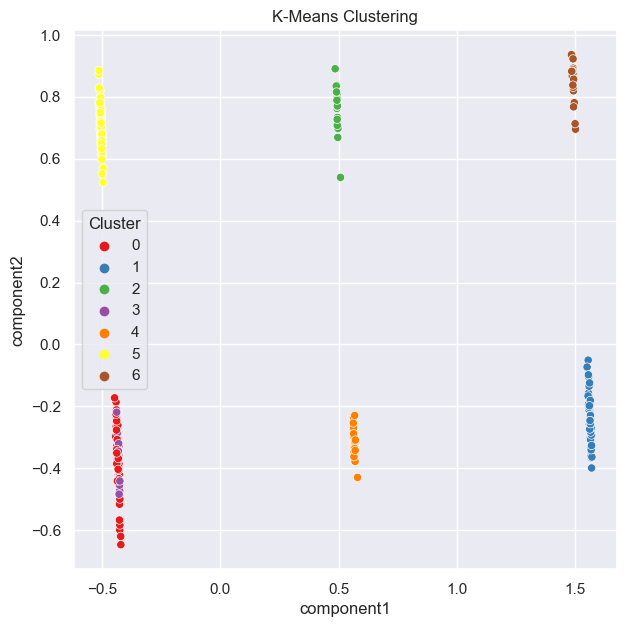

In [66]:
kmeans = KMeans(n_clusters = 7,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
y_kmeans = kmeans.fit_predict(data)

df_cluster = df
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data)

pca_df = pd.DataFrame(pca_components, columns=['component1', 'component2'])
clustered_data = pd.concat([pca_df, df_cluster['Cluster']], axis=1)

plt.figure(figsize=(7, 7))
sns.scatterplot(x='component1', y='component2', hue='Cluster', data=clustered_data, palette='Set1').set_title('K-Means Clustering')
plt.show()

es résultats obtenus en utilisant plus de six clusters montrent que les clusters rouge et violet se superposent, ce qui indique une similarité entre les caractéristiques des données correspondantes. Par conséquent, il est raisonnable de conclure que le nombre optimal de clusters est six, car tout nombre supérieur ne permettrait pas de créer des distinctions significatives entre les données et ne ferait que subdiviser davantage les nuages de points déjà formés avec six clusters.

Maintenant, nous avons la possibilité d'explorer les corrélations entre chaque caractéristique et les groupes que nous avons attribués.

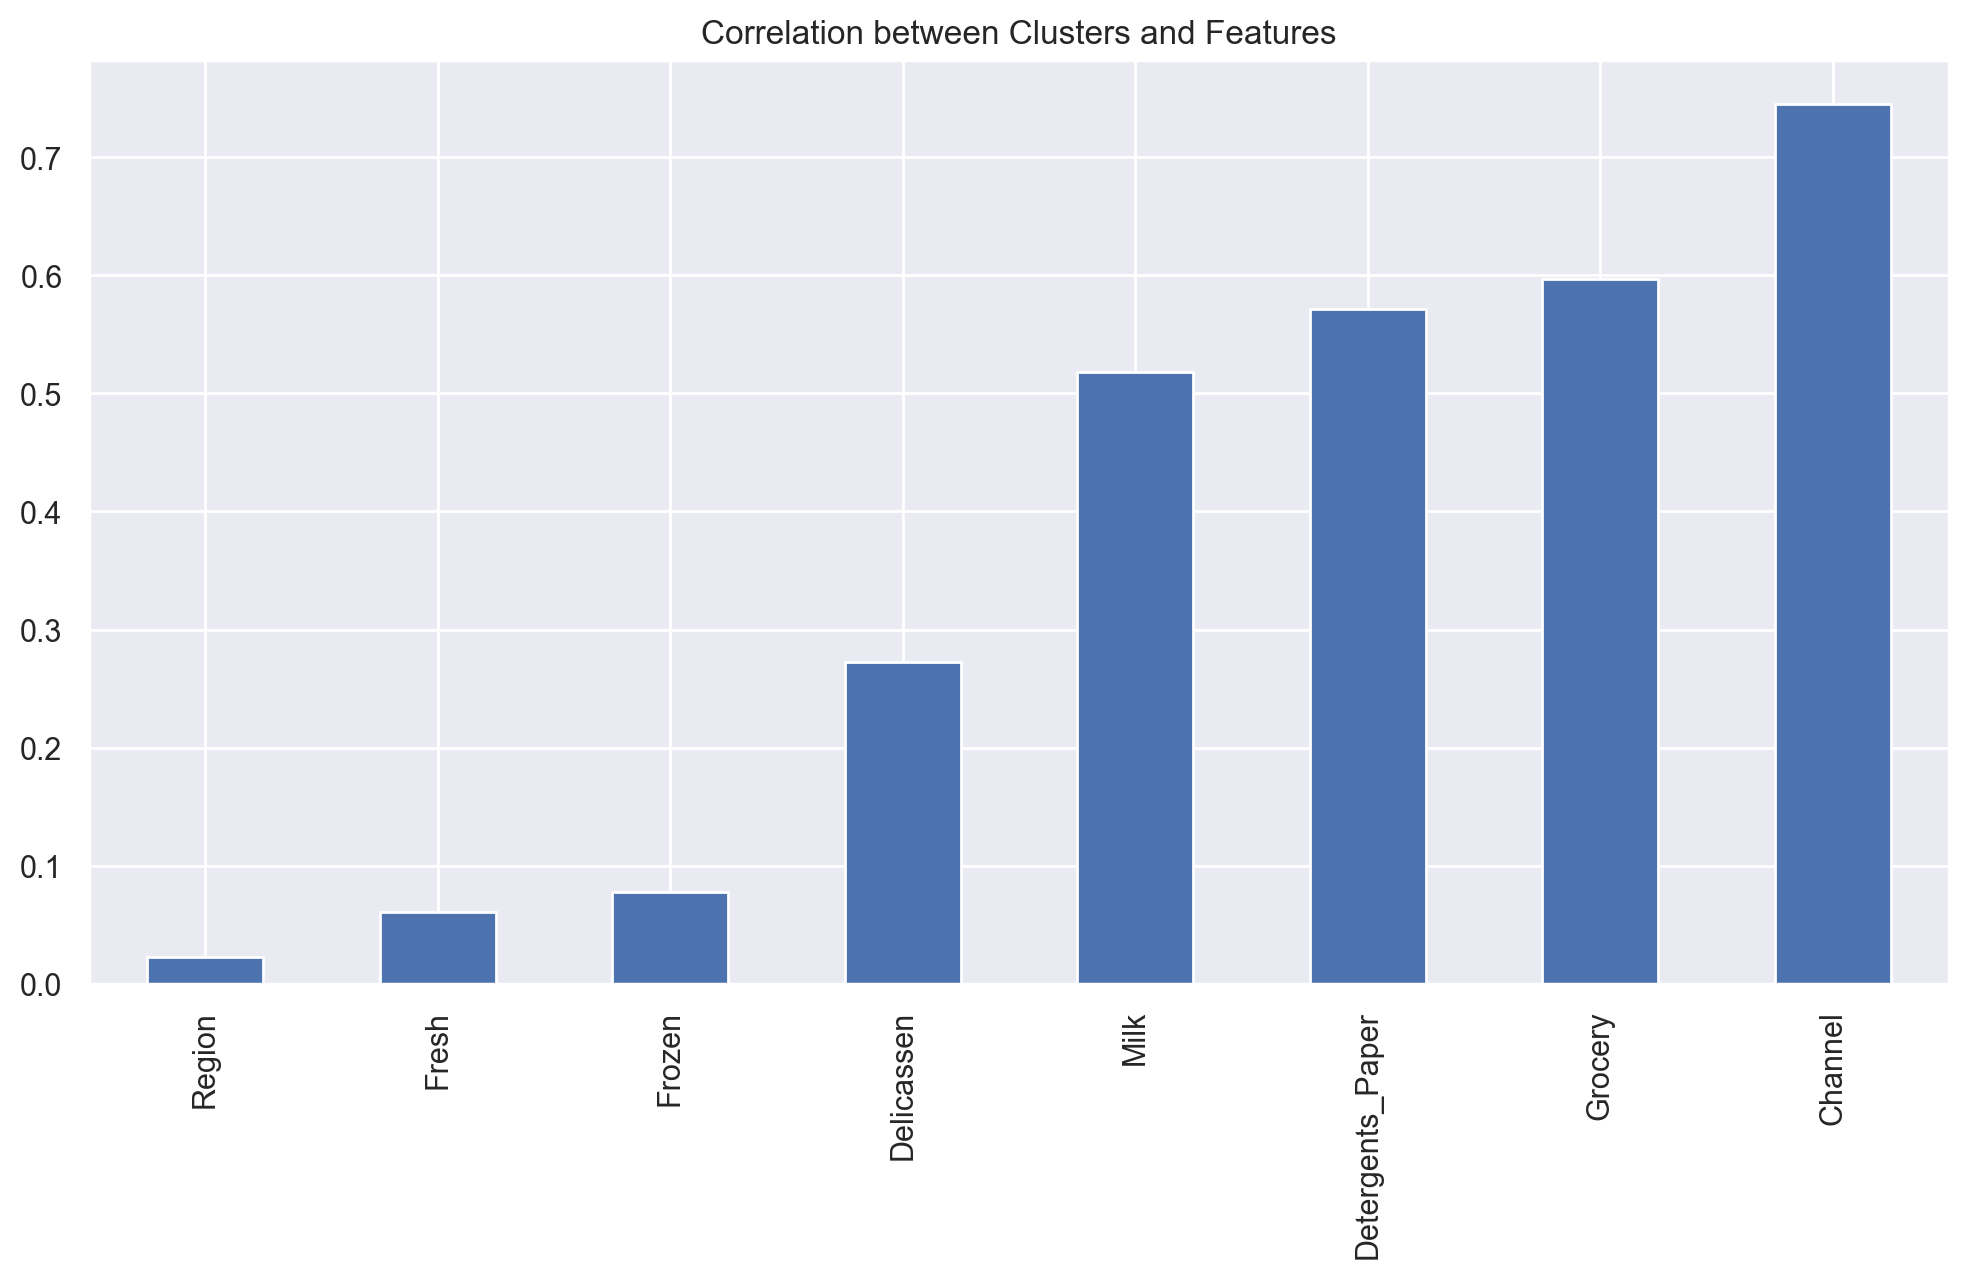

In [70]:
plt.figure(figsize=(12,6),dpi=200)
df_cluster.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

Nous avons la possibilité de calculer une corrélation entre les différents clusters.

Nous avons effectué un apprentissage non supervisé dans le but de réaliser une segmentation, puisque les données étaient continues. Cependant, nous avons constaté que les données n'étaient pas fortement corrélées les unes avec les autres, ce qui peut rendre l'interprétation des résultats plus complexe.
Par ailleurs, nous avons envisagé d'utiliser l'algorithme DBSCAN, qui diffère des méthodes traditionnelles en permettant se ase sur les distances plutôt que de se baser sur les similarités entre les données et du nombre fixe de clusters. Cela pourrait conduire à des résultats plus pertinents en calculant les distances entre les valeurs souhaitées et les distances réelles.

En appliquant l'algorithme de regroupement K-Means, nous avons réussi à segmenter les clients en 5, 6 et 7 groupes distincts. En utilisant l'analyse en composantes principales pour réduire la dimensionnalité, nous avons pu visualiser ces groupes de manière plus claire et intuitive. Après avoir utilisé la méthode de l'Elbow Curve, nous avons déterminé que le nombre optimal de clusters est de 6, car au-delà de ce nombre, les clusters se chevauchent et ne permettent pas une séparation nette des données.